# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn import preprocessing

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [294]:
#%%pycodestyle


class MyKmeans:

    def __init__(self,
                 k=2,
                 metric='euclidean',
                 max_iter=1000,
                 random_state=None,
                 init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init
        
    def init_centrs_k_meanspp(self, X):
        self.centroids = np.empty((self.k, X.shape[1]))
        self.centroids[0] = X[np.random.choice(X.shape[0])]
        
        for i in range(1, self.k):
            d = pairwise_distances(X, self.centroids[:i, :]).min(axis=1)
            d = d / d.sum()
            self.centroids[i] = X[np.random.choice(X.shape[0],
                                                   replace=False,
                                                   p=d)]
    
    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here

        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
        elif self.init == 'k-means':
            self.init_centrs_k_meanspp(X)
        
        for i in range(self.max_iter):
            d = pairwise_distances(X, self.centroids, self.metric)
            self.labels = np.argmin(d, axis=1)
            for cl_ind in range(self.k):
                X_cl = X[self.labels == cl_ind]
                if X_cl.shape[0] > 0:
                    self.centroids[cl_ind] = np.mean(X_cl, axis=0)
                    
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        d = pairwise_distances(X, self.centroids, self.metric)
        return np.argmin(d, axis=1)


class MiniBatchMyKmeans(MyKmeans):
    
    def __init__(self,
                 k=2,
                 metric='euclidean',
                 max_iter=1000,
                 random_state=None,
                 init='random',
                 batch_size=10):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size
        
    def fit(self, X, y=None):
         # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))
        
        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
        elif self.init == 'k-means':
            self.init_centrs_k_meanspp(X)
            
        inds = np.arange(X.shape[0])
        np.random.shuffle(inds)
        cut = 0
        for i in range(self.max_iter):
            batch_inds = inds[cut: min(X.shape[0], cut + self.batch_size)]
            X_batch = X[batch_inds]

            dist = pairwise_distances(X_batch, self.centroids,
                                      metric=self.metric)
            self.labels = np.argmin(dist, axis=1)

            for cl_ind in range(self.k):
                X_cl = X_batch[self.labels == cl_ind]
                if X_cl.shape[0] > 0:
                    self.centroids[cl_ind] = (self.centroids[cl_ind] * i
                                             + np.mean(X_cl, axis=0)) / (i + 1)
            
            cut += self.batch_size
            if cut >= X.shape[0]:
                cut = 0
                np.random.shuffle(inds)
        return self
        
        

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [295]:
from sklearn.datasets import make_blobs

In [296]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

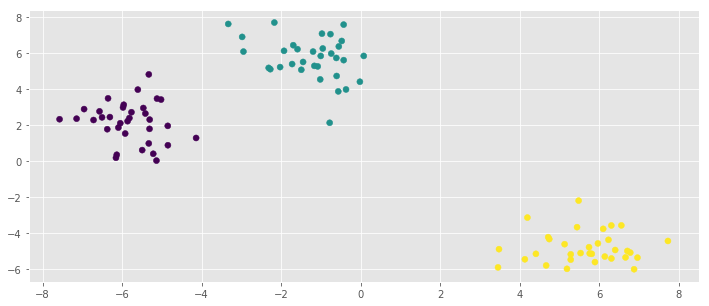

In [297]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

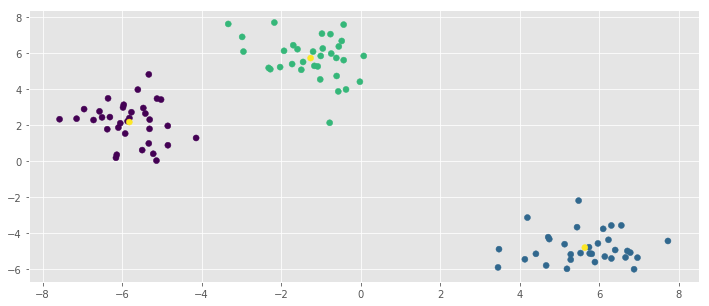

In [299]:
## Работоспособность MyKmeans

my_clf = MyKmeans(k=3, init='random')
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

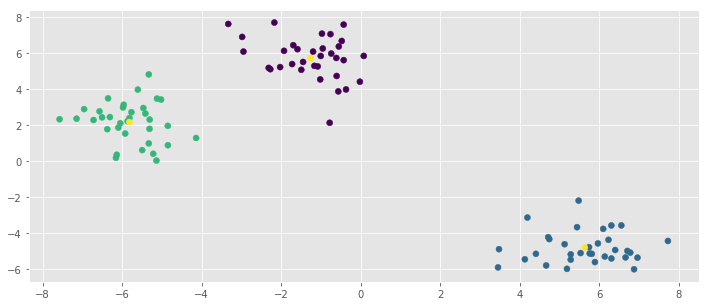

In [300]:
## Работоспособность MyKmeans++

my_clf = MyKmeans(k=3, init='k-means')
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

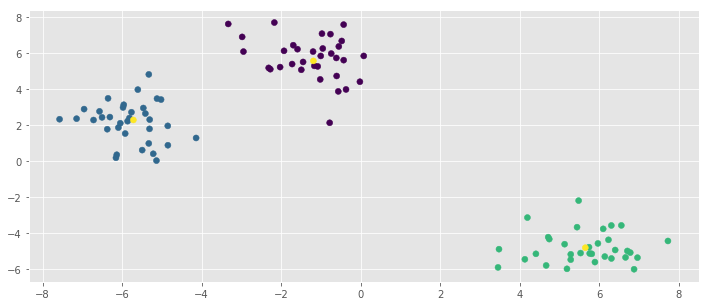

In [301]:
## Работоспособность MyKmeans с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3)
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

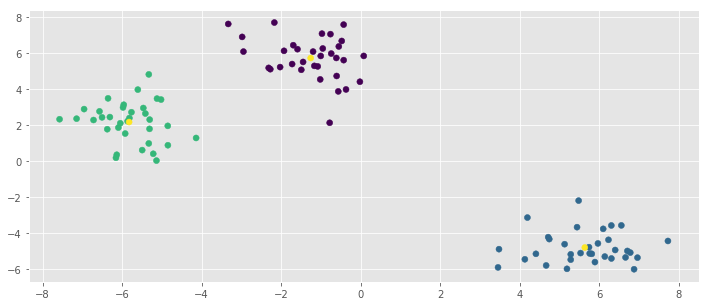

In [302]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3, init='k-means')
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

# ВНИМАНИЕ


Разница во времени работы алгоритмов с MiniBatch и без него на малых данных в этой работе по каким-то причинам не соответствует действительности. Почему-то MiniBatch отрабатывает дольше именно на моей машине. На чуть более больших и реальных данных ниже все в порядке.

In [303]:
## Время выполнения алгоритма Kmeans из sklearn

clf = KMeans(n_clusters=3, max_iter=1000, tol=0)
%time clf.fit(X)

CPU times: user 1.24 s, sys: 9.34 ms, total: 1.25 s
Wall time: 1.26 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0, verbose=0)

In [304]:
## Время выполнения алгоритма MyKmeans
clf = MyKmeans(k=3)
%time clf.fit(X)

CPU times: user 125 ms, sys: 4.01 ms, total: 129 ms
Wall time: 128 ms


In [305]:
## Время выполнения алгоритма MyKmeans++
my_clf = MyKmeans(k=3, init='k-means')
%time my_clf.fit(X)

CPU times: user 127 ms, sys: 4.09 ms, total: 131 ms
Wall time: 130 ms


In [306]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3, init='random')
%time my_clf.fit(X)

CPU times: user 140 ms, sys: 3.66 ms, total: 143 ms
Wall time: 142 ms


In [307]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3, init='k-means')
%time my_clf.fit(X)

CPU times: user 139 ms, sys: 4.9 ms, total: 144 ms
Wall time: 142 ms


In [308]:
import time

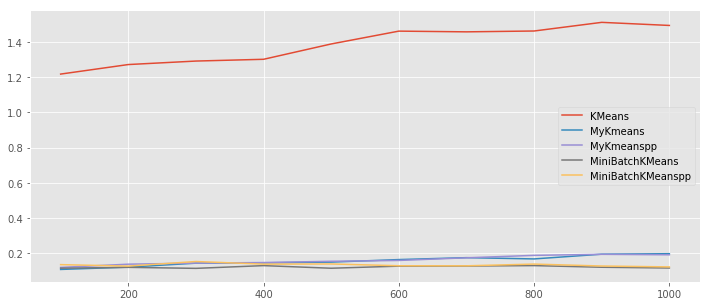

In [309]:
clfs = [KMeans(n_clusters=3, max_iter=1000, tol=0),
        MyKmeans(k=3, init='random'),
        MyKmeans(k=3, init='k-means'),
        MiniBatchMyKmeans(k=3, init='random'),
        MiniBatchMyKmeans(k=3, init='k-means')]

clfs_label = ['KMeans',
            'MyKmeans',
            'MyKmeanspp',
            'MiniBatchKMeans',
            'MiniBatchKMeanspp']

x_nums_sample = range(100, 1001, 100)
y_time = [[] for i in range(len(x_nums_sample))]
X_datas = []

for n_samples in x_nums_sample:
    X, _ = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=4321)
    
    X_datas.append(n_samples)
    for i in range(len(clfs)):
        t = time.time()
        clfs[i].fit(X)
        y_time[i].append(time.time() - t)

for i in range(len(clfs)):
    plt.plot(X_datas, y_time[i], label=clfs_label[i])

plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [310]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [311]:
df = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis='columns')

In [312]:
keys = df.columns

In [313]:
scaler = preprocessing.StandardScaler()
scaler.fit_transform(df)

array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [326]:
def clust_info(clf, N=5):
    res = clf.predict(df)
    _, counts = np.unique(res, return_counts=True)
    for clust in range(clf.centroids.shape[0]):
        print('Centroid: {}'.format(clust))
        print('Students: {}'.format(counts[clust]))
        indices = np.argpartition(-clf.centroids[clust], 5)[:5]
        print('Top 5 hobbies: {}\n'.format(list(keys[indices])))

In [331]:
## MyKMeans

my_clf = MyKmeans(k=9, init='random')
%time my_clf.fit(df.values)
clust_info(my_clf)

CPU times: user 21.7 s, sys: 1.15 s, total: 22.8 s
Wall time: 11.5 s
Centroid: 0
Students: 13428
Top 5 hobbies: ['cute', 'shopping', 'god', 'dance', 'football']

Centroid: 1
Students: 1432
Top 5 hobbies: ['football', 'music', 'basketball', 'softball', 'volleyball']

Centroid: 2
Students: 1855
Top 5 hobbies: ['hair', 'music', 'cute', 'sex', 'mall']

Centroid: 3
Students: 1096
Top 5 hobbies: ['dance', 'music', 'shopping', 'hair', 'cute']

Centroid: 4
Students: 9105
Top 5 hobbies: ['band', 'music', 'shopping', 'rock', 'cute']

Centroid: 5
Students: 100
Top 5 hobbies: ['church', 'god', 'jesus', 'music', 'bible']

Centroid: 6
Students: 2054
Top 5 hobbies: ['church', 'jesus', 'shopping', 'music', 'god']

Centroid: 7
Students: 214
Top 5 hobbies: ['sex', 'music', 'hair', 'band', 'blonde']

Centroid: 8
Students: 716
Top 5 hobbies: ['soccer', 'music', 'shopping', 'hair', 'god']



In [332]:
## MyKMeans++

my_clf = MyKmeans(k=9, init='k-means')
%time my_clf.fit(df.values)
clust_info(my_clf)

CPU times: user 22.1 s, sys: 1.54 s, total: 23.6 s
Wall time: 12 s
Centroid: 0
Students: 4798
Top 5 hobbies: ['music', 'shopping', 'soccer', 'god', 'church']

Centroid: 1
Students: 1111
Top 5 hobbies: ['shopping', 'dance', 'music', 'hair', 'cute']

Centroid: 2
Students: 1
Top 5 hobbies: ['blonde', 'sex', 'hair', 'god', 'death']

Centroid: 3
Students: 836
Top 5 hobbies: ['marching', 'band', 'music', 'god', 'dance']

Centroid: 4
Students: 552
Top 5 hobbies: ['jesus', 'god', 'church', 'music', 'die']

Centroid: 5
Students: 536
Top 5 hobbies: ['volleyball', 'softball', 'music', 'basketball', 'shopping']

Centroid: 6
Students: 2195
Top 5 hobbies: ['cute', 'hair', 'music', 'mall', 'sex']

Centroid: 7
Students: 19653
Top 5 hobbies: ['music', 'god', 'cute', 'shopping', 'dance']

Centroid: 8
Students: 318
Top 5 hobbies: ['rock', 'hair', 'sex', 'music', 'kissed']



In [333]:
## MyKMeans с MiniBatchMyKMeans

my_clf = MiniBatchMyKmeans(k=9, init='random')
%time my_clf.fit(df.values)
clust_info(my_clf)

CPU times: user 367 ms, sys: 10.7 ms, total: 378 ms
Wall time: 224 ms
Centroid: 0
Students: 796
Top 5 hobbies: ['sex', 'mall', 'hair', 'cute', 'kissed']

Centroid: 1
Students: 1939
Top 5 hobbies: ['shopping', 'cute', 'band', 'church', 'music']

Centroid: 2
Students: 20161
Top 5 hobbies: ['god', 'dance', 'music', 'shopping', 'basketball']

Centroid: 3
Students: 232
Top 5 hobbies: ['baseball', 'softball', 'dance', 'music', 'cute']

Centroid: 4
Students: 572
Top 5 hobbies: ['shopping', 'softball', 'jesus', 'music', 'hollister']

Centroid: 5
Students: 927
Top 5 hobbies: ['god', 'die', 'music', 'hair', 'church']

Centroid: 6
Students: 1041
Top 5 hobbies: ['hair', 'music', 'rock', 'sex', 'band']

Centroid: 7
Students: 3429
Top 5 hobbies: ['rock', 'god', 'music', 'dance', 'band']

Centroid: 8
Students: 903
Top 5 hobbies: ['dance', 'cute', 'sexy', 'music', 'hair']



In [334]:
## MyKMeans++ с MiniBatchMyKMeans

my_clf = MiniBatchMyKmeans(k=9, init='k-means')
%time my_clf.fit(df.values)
clust_info(my_clf)

CPU times: user 451 ms, sys: 12.3 ms, total: 464 ms
Wall time: 239 ms
Centroid: 0
Students: 684
Top 5 hobbies: ['hair', 'basketball', 'soccer', 'baseball', 'football']

Centroid: 1
Students: 555
Top 5 hobbies: ['church', 'band', 'hair', 'rock', 'god']

Centroid: 2
Students: 466
Top 5 hobbies: ['sports', 'baseball', 'football', 'god', 'rock']

Centroid: 3
Students: 3738
Top 5 hobbies: ['cute', 'shopping', 'hair', 'music', 'dance']

Centroid: 4
Students: 945
Top 5 hobbies: ['dance', 'music', 'hair', 'god', 'sex']

Centroid: 5
Students: 13
Top 5 hobbies: ['cheerleading', 'football', 'music', 'hollister', 'abercrombie']

Centroid: 6
Students: 253
Top 5 hobbies: ['dress', 'tennis', 'shopping', 'music', 'sports']

Centroid: 7
Students: 875
Top 5 hobbies: ['band', 'music', 'sexy', 'rock', 'soccer']

Centroid: 8
Students: 22471
Top 5 hobbies: ['god', 'music', 'dance', 'shopping', 'hair']



## Вывод

Почему-то при запуске на моем ноутбуке на малых данных MiniBatch-реализация отрабатывает медленнее, чем обычная. Однако, на других машинах все в порядке. На больших же данных скорости алгоритмов соответствуют теоретической. При печати информации время так же выведено. Причину этого я выяснить не смог.

Если сравнивать алгоритмы по времени работы, то, очевидно, что выигрывает реализация с MiniBatch, что особенно заметно на больших данных. Однако, MiniBatch-реализация проигрывает по точности. 

На наших реальных данных все четыре алгоритма отработали, в принципе, неплохо, выделяя почти одинаковые группы студентов, например: спортсменов, увлекающихся религией, увлекающихся модой девушек и т.д. Всё же в MiniBatch-реализации группы получаются чуть более размыты по интересам, но их все равно можно правильно интерпретировать. Наиболее точным для данной задачи мне показался MyKmeans.

Сложно сравнить и сказать, какой из алгоритмов лучше, так как всё зависит от поставленной задачи. При очень большом количестве данных и ограниченном количестве времени лучше, наверное, будет применить MiniBatch. Если же никакого ограничения нет, то k-means++ даст наилучший результат.